## 14.4 Homework
- 1, Import the visual package in python to make an animation on the screen of the position of the particle in Brownian motion.
- 2, rewrite the radioactive decay, to generate 1000 random numbers following the non-uniformed distribution.

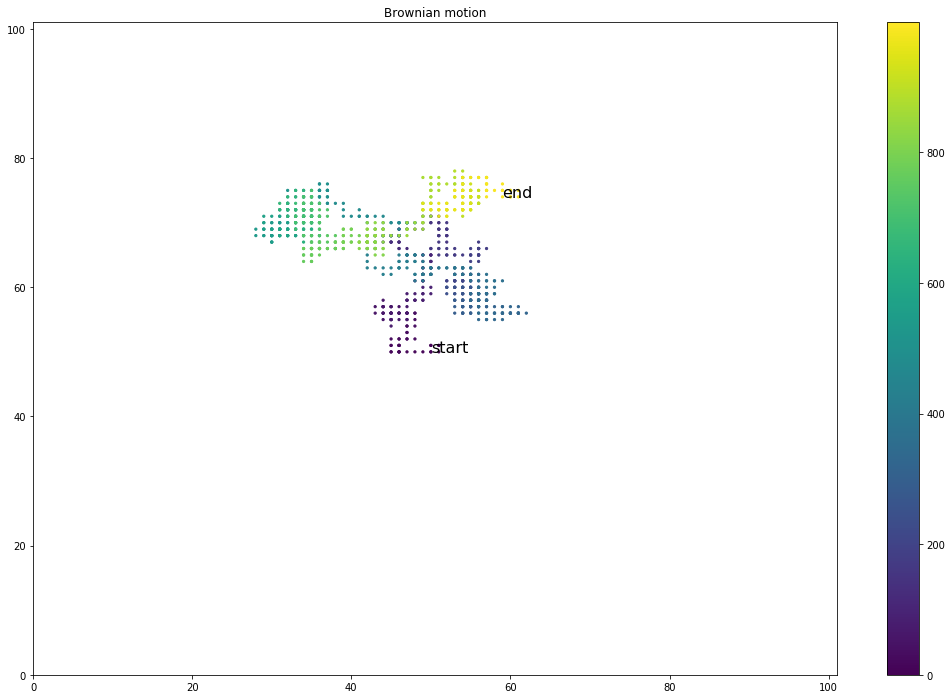

In [1]:
"""
Below is the code from lecture where we just plotted the Brownian motion.

"""

%matplotlib inline
# Brownian Motion
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import Funcanimation

# init
L1 = 101
L2 = 101
N = 1000

fig = plt.figure(figsize=[18, 12])


position = np.empty([N,2])
position[0,0] = int(L1/2)
position[0,1] = int(L2/2)
direction = np.array([[0,1],[0,-1],[1,0],[-1,0]])

# random walk
for i in range(1,N):
    position1 = [-1,-1]
    
    while min(position1)<0 or position1[0] >L1 or position1[1] >L2:
        move = np.random.randint(len(direction))
        position1 = position[i-1,:] + direction[move]
     
    position[i,:] = position1
    
plt.xlim(0,101)
plt.ylim(0,101)
plt.title('Brownian motion')
plt.scatter(position[:,0], position[:,1], c=range(N), s=5)
plt.text(position[0,0], position[0,1], 'start', fontsize=16)
plt.text(position[-1,0], position[-1,1], 'end', fontsize=16)

plt.colorbar()
plt.show()

I couldn't figure out how to properly install and import vpython package, so I tried to use matplotlib's animation package instead. I got it to initially plot, but am having difficulty creating the actual animation. The code for this is below. For my animation attempt, I looked at the following website tutorial for reference: https://www.instructables.com/id/Animation-With-Python-and-Matplotlib/


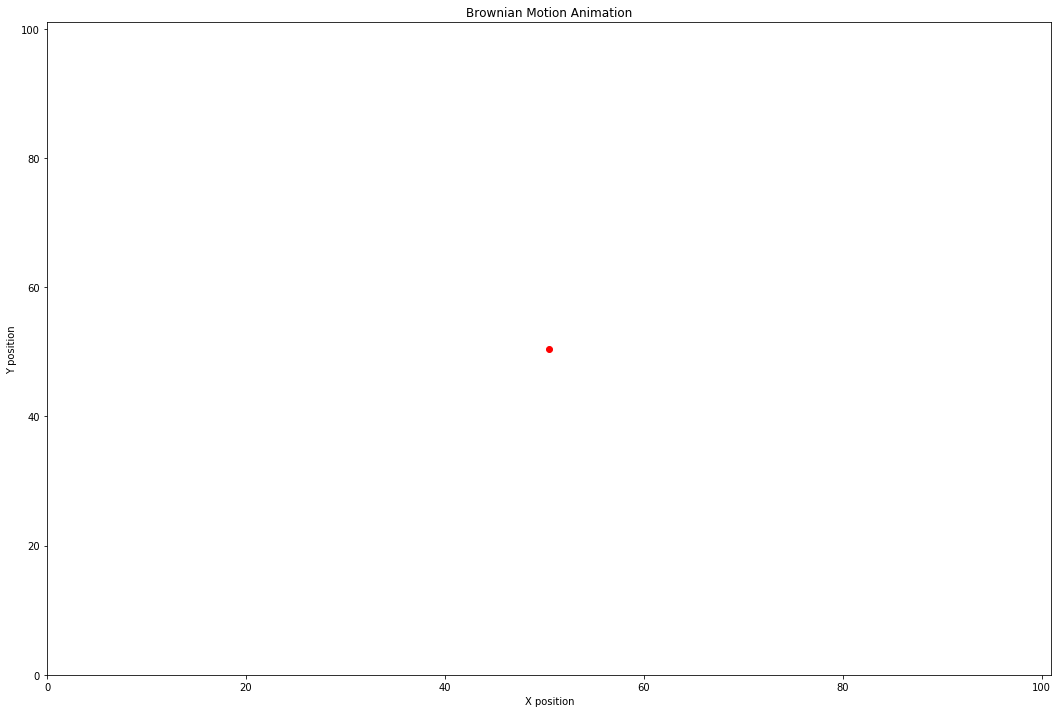

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

L1 = 101
L2 = 101

fig = plt.figure(figsize = [18, 12])
ax = plt.axes(xlim=(0, L1), ylim=(0, L2))
plt.title('Brownian Motion Animation')
plt.xlabel('X position')
plt.ylabel('Y position')
N = 1000

def init():
    particle.set_data([L1/2], [L2/2])
    return particle,

xpos = int(L1/2)
ypos = int(L2/2)
particle, = plt.plot([], [], 'ro', animated=True)
  
def animate(position):
    
    position1 = [-1,-1]
    
    direction = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    
    while min(position1)<0 or position1[0] >L1 or position1[1] >L2:
        move = np.random.randint(len(direction))
        position1 = position + direction[move]
        
    position = position1
    
    particle.set_data(position[0], position[1])
    
    return particle,

particle_anim = animation.FuncAnimation(fig, animate, frames=N, init_func=init, blit=True, repeat=True)

#particle_anim.save('particle.mp4')


plt.show()

Part 2)

From our lecture on radioactive decay, generate 1000 random numbers.

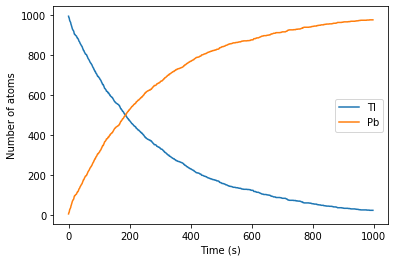

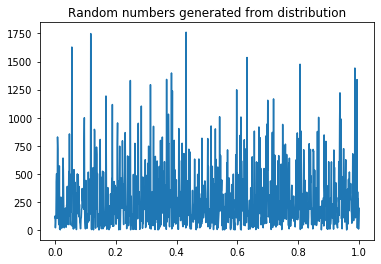

In [55]:
# To generate the exponential distribution from non-uniform distribution
import numpy as np
import matplotlib.pyplot as plt

tau = 3.053*60

N_atom = 1000   #1000 Tl atoms
N_time = 1000   #1000 seconds
mu = np.log(2)/tau
N_Pb = np.zeros([N_time-1])  #the array to store the number of decayed atoms in each time step 
N_Tl = N_atom * np.ones([N_time-1])  #the array to store the number of decayed atoms in each time step 

x = []
for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    x.append(x0)
    if x0<N_time:     
        N_Pb[x0:] += 1  #after decay, we need to count 1 from now on
        N_Tl[x0:] -= 1  #after decay, we need to count 1 from now on
        
plt.plot(N_Tl, label='Tl')
plt.plot(N_Pb, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()

plt.plot(np.linspace(0,1,N_atom), x)
plt.title("Random numbers generated from distribution")
plt.show()
